In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [4]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    number3: int
    number4: int
    operation2: str
    finalNumber1: int
    finalNumber2: int

In [5]:
def add_node(state: AgentState) -> AgentState:
    """This node sum the numbers"""
    state["finalNumber1"]= state["number1"] + state["number2"]
    return state

def subtract_node(state: AgentState) -> AgentState:
    """This node subtract the numbers"""
    state["finalNumber1"]= state["number1"] - state["number2"]
    return state

def add_node2(state: AgentState) -> AgentState:
    """This node sum the numbers"""
    state["finalNumber2"]= state["finalNumber1"] + state["number3"] + state["number4"]
    return state

def subtract_node2(state: AgentState) -> AgentState:
    """This node subtract the numbers"""
    state["finalNumber2"]= state["finalNumber1"] - (state["number3"] - state["number4"])
    return state

def decide_next_node(state: AgentState) -> AgentState:
    if state["operation1"] == "+":
        return "addition_operation"
    elif state["operation1"] == "-":
        return "subtraction_operation"

def decide_next_node2(state: AgentState) -> AgentState:
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"


In [7]:
graph= StateGraph(AgentState)

graph.add_node("add_node", add_node)
graph.add_node("subtract_node", subtract_node)
graph.add_node("add_node2", add_node2)
graph.add_node("subtract_node2", subtract_node2)
graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation":"subtract_node"
    }
)

graph.add_edge("add_node","router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app= graph.compile()

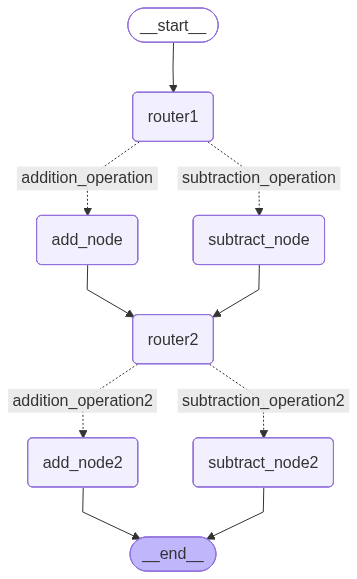

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
answer= app.invoke({"number1": 4, "operation1": "+", "number2": 3, "number3": 2, "number4": 1, "operation2": "-"})
print(answer)

{'number1': 4, 'operation1': '+', 'number2': 3, 'number3': 2, 'number4': 1, 'operation2': '-', 'finalNumber1': 7, 'finalNumber2': 6}
